Anotações importantes

yr_renovated = 0 irei considerar como casas que nunca foram reformadas. 
Assumirei que o número 33 (valor único) é um erro de digitação, pois não faz sentido devido ao tamanho da casa. Transformarei esse valor em 3. 

estatística descritiva foi utilizada para verificar possiveis valores errados e dar uma visão geral dos dados


# 0.0 Importar pacotes

In [1]:
import pandas as pd

import numpy as np

import plotly.express as px

from matplotlib import pyplot as plt

import seaborn as sns

from matplotlib import gridspec

import matplotlib.ticker as mtick

/home/user/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Funções Auxiliares

In [2]:
pd.options.display.float_format = '{:.2f}'.format
    

plt.rcParams['figure.figsize'] = (11,7)

# 1.0 Dados

## 1.1 Importando dataset

In [3]:
df = pd.read_csv('dataset/kc_house_data.csv')

## 1.2 Dimensão dos dados

In [4]:
print('Número de linha:', df.shape[0])

print('Número de colunas:', df.shape[1])

Número de linha: 21613
Número de colunas: 21


## 1.3 Tipos de variáveis

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4 Alterando os tipos de variáveis

In [6]:
df['date'] = pd.to_datetime(df['date']) #transformando para o formato certo



## 1.5 Limpeza de dados

### 1.5.1 Check NA

In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.5.2 Estatística descritiva

In [8]:
df1 = df.copy()

In [9]:
#Incluindo somente variáveis numéricas
atri_num = df1.select_dtypes(include = ['int64', 'float64'])
#deletando a coluna 'ID'
atri_num = atri_num.iloc[:, 1: ]


In [10]:
#análise descritiva
df_mean =  pd.DataFrame(atri_num.apply(np.mean)).T
df_median = pd.DataFrame(atri_num.apply(np.median)).T
df_std = pd.DataFrame(atri_num.apply(np.std)).T
df_min = pd.DataFrame(atri_num.apply(np.min)).T
df_max = pd.DataFrame(atri_num.apply(np.max)).T

#concatenando
est = pd.concat( [df_mean, df_median,  df_std, df_min, df_max ] ).T.reset_index()

#alterando o nome das colunas
est.columns = [ 'atributos','media', 'mediana', 'std', 'min', 'max']

est

,atributos,media,mediana,std,min,max
0,price,540088.14,450000.00,367118.70,75000.00,7700000.00
1,bedrooms,3.37,3.00,0.93,0.00,33.00
2,bathrooms,2.11,2.25,0.77,0.00,8.00
3,sqft_living,2079.90,1910.00,918.42,290.00,13540.00
4,sqft_lot,15106.97,7618.00,41419.55,520.00,1651359.00
5,floors,1.49,1.50,0.54,1.00,3.50
6,waterfront,0.01,0.00,0.09,0.00,1.00
7,view,0.23,0.00,0.77,0.00,4.00
8,condition,3.41,3.00,0.65,1.00,5.00
9,grade,7.66,7.00,1.18,1.00,13.00


In [11]:
#substituindo o valor de 33 na coluna bedrooms por 3
df.loc[(df['bedrooms'] == 33, 'bedrooms')] = 3

# 2.0 Exploração de dados

## 2.1 Insights

In [12]:
df = df.copy()

In [28]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### **H1:**   Imóveis com vista para a água são em média 30% mais caros

<BarContainer object of 2 artists>

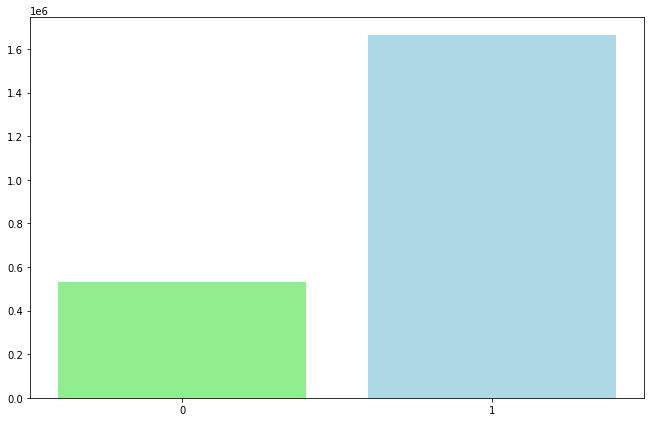

In [59]:
water = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

water['waterfront'] = water['waterfront'].astype(str)

plt.bar(water['waterfront'], water['price'], color = ['lightgreen', 'lightblue'])





### H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.


### H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que imóveis com 	porões.


### H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%


###  H5: Imóveis com 3 banheiros tem um crescimento mês após mês (MoM) de 15%.


### H6: Imóveis que nunca foram reformadas (yr_built == 0) são em média 20% mais baratos. 


### H7: Imóveis em más condições e com boa vista (view) são 10% mais caros.


### H8: Imóveis antigos e não renovados são 40% mais baratos. 


### H9: Imóveis com mais banheiros são 5% mais caros.


### H10: Imóveis renovados recentemente são 35% mais caros.